<a href="https://colab.research.google.com/github/vishnu-nitc/NLP-Chatbot/blob/main/Copy_of_Group_3_NLP_ChatbotGridsearchUpdated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import re 
import nltk 
import keras
import tensorflow as tf
from tensorflow import keras

import random
import json
import pickle
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import load_model
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

nltk.download('stopwords',quiet=True) # stopword library
nltk.download('wordnet', quiet=True) # wordnet library
nltk.download('words', quiet=True) # words library
nltk.download('punkt', quiet=True) # tokenize library
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/My Drive/AIML/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [5]:
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [6]:
#check if any column have missing value
def missing_val_cnt(data_frame):
    nullchecksr = data_frame.isnull().sum()
    
    if ((nullchecksr.values > 0).any()):
        print('Missing values list:\n')
        print(nullchecksr[nullchecksr.values > 0])
    else:
        print('There is no missing value found.')

In [7]:
# Missing values
missing_val_cnt(df)

There is no missing value found.


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
#Dropping the first column 'Unnamed'
df.drop(columns=df.columns[0],axis=1,inplace=True)

In [10]:
#Rename column with meaningful label
df.rename(columns = {'Data':'Date & Timestamp'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


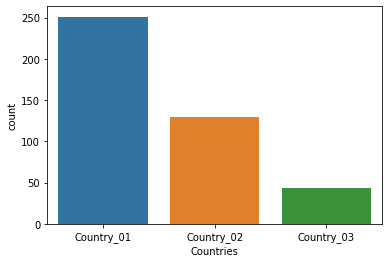

In [11]:
#EDA- Visualisation and preprocessing of each variable
sns.countplot(df['Countries']);

In [12]:
df['Countries'].replace(['Country_01', 'Country_02', 'Country_03'],[1,2,3], inplace=True)
df['Countries']=df['Countries'].astype(int)

In [13]:
df['Local']=df['Local'].str[6:]
df['Local']=df['Local'].astype(int)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


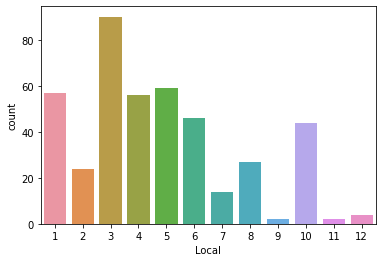

In [14]:
sns.countplot(df['Local']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


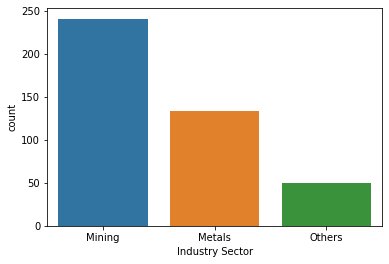

In [15]:
sns.countplot(df['Industry Sector']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


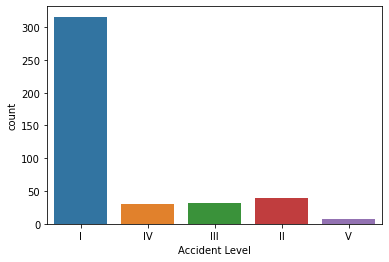

In [16]:
sns.countplot(df['Accident Level']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


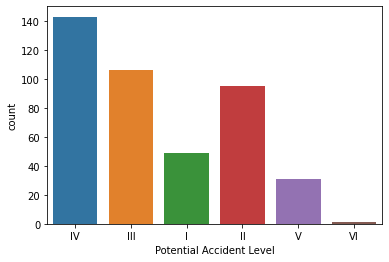

In [17]:
sns.countplot(df['Potential Accident Level']);

In [18]:
df['Accident Level']=df['Accident Level'].replace(['I','II','III','IV','V'],[1,2,3,4,5])
df['Accident Level']=df['Accident Level'].astype(int)

In [19]:
df['Potential Accident Level']=df['Potential Accident Level'].replace(['I','II','III','IV','V','VI'],[1,2,3,4,5,6])
df['Potential Accident Level']=df['Potential Accident Level'].astype(int)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


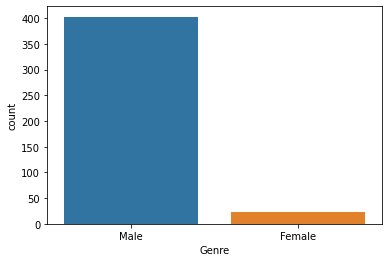

In [20]:
sns.countplot(df['Genre']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


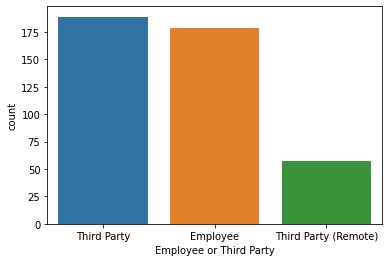

In [21]:
sns.countplot(df['Employee or Third Party']);

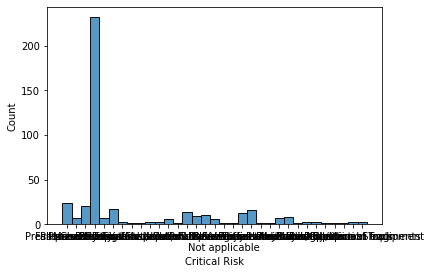

In [22]:
sns.histplot(df['Critical Risk']);

In [23]:
df['Critical Risk'].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Projection of fragments                        2
Machine Protection  

In [24]:
df['Critical Risk'].nunique()

33

In [25]:
df['Date'] = pd.to_datetime(df['Date & Timestamp'])

df['Year'] = df.Date.apply(lambda x : x.year)
df['Month'] = df.Date.apply(lambda x : x.month)
df['Day'] = df.Date.apply(lambda x : x.day)
df['Weekday'] = df.Date.apply(lambda x : x.day_name())
df['WeekofYear'] = df.Date.apply(lambda x : x.weekofyear)

In [26]:
#Defining seasons for months in Brazil
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [27]:
df['Season'] = df['Month'].apply(month2seasons)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


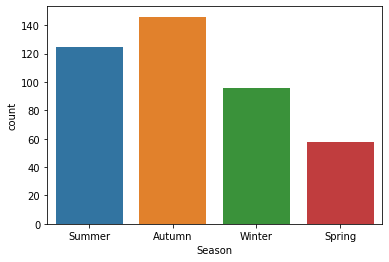

In [28]:
sns.countplot(df['Season']);

In [29]:
le=LabelEncoder()
df['Season']=le.fit_transform(df['Season'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


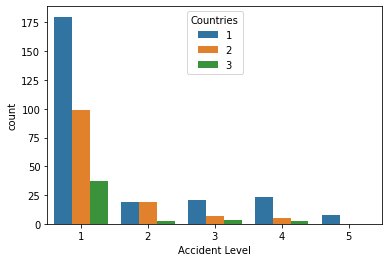

In [30]:
#Bivariate analysis
sns.countplot(df['Accident Level'],hue=df['Countries']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


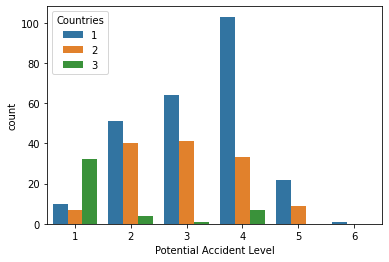

In [31]:
sns.countplot(df['Potential Accident Level'],hue=df['Countries']);


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


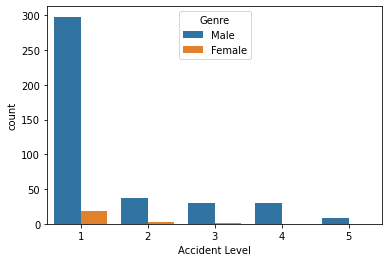

In [32]:
sns.countplot(df['Accident Level'],hue=df['Genre']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


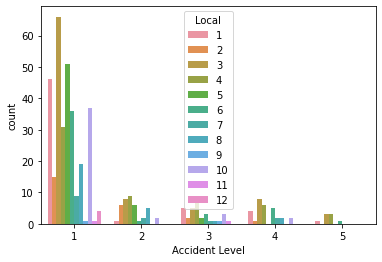

In [33]:
sns.countplot(df['Accident Level'],hue=df['Local']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


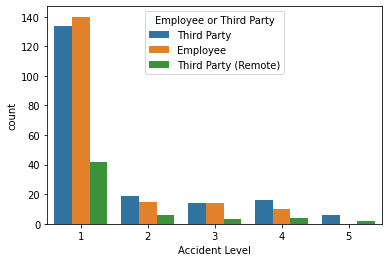

In [34]:
sns.countplot(df['Accident Level'],hue=df['Employee or Third Party']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


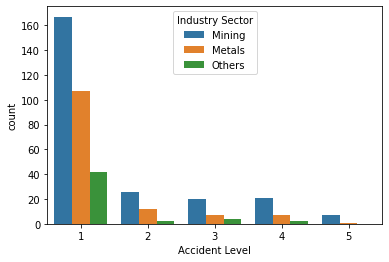

In [35]:
sns.countplot(df['Accident Level'],hue=df['Industry Sector']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


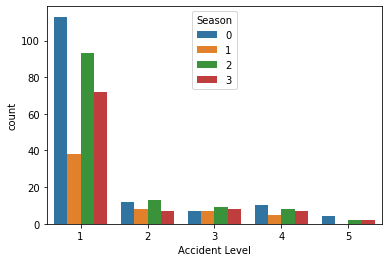

In [36]:
sns.countplot(df['Accident Level'],hue=df['Season']);

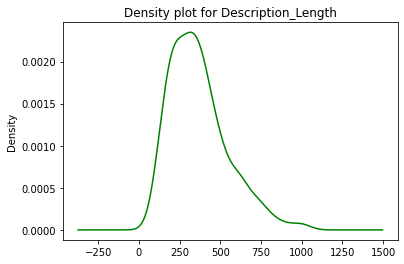

In [37]:
#Analysing Description variable
df['Description_Length']=df['Description'].str.len()
df.Description_Length.plot.density(color='green')
plt.title('Density plot for Description_Length')
plt.show()

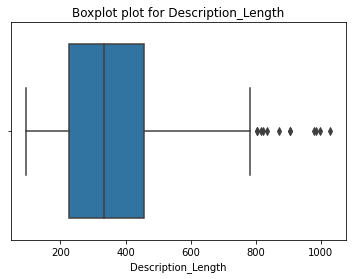

In [38]:
sns.boxplot(x=df["Description_Length"])
plt.title('Boxplot plot for Description_Length')
plt.show()

In [39]:
print('Average length of Description : ',df.Description.str.len().mean())
print('Maximum length of Description : ',df.Description.str.len().max())
print('Minimum length of Description : ',df.Description.str.len().min())

Average length of Description :  368.28
Maximum length of Description :  1029
Minimum length of Description :  94


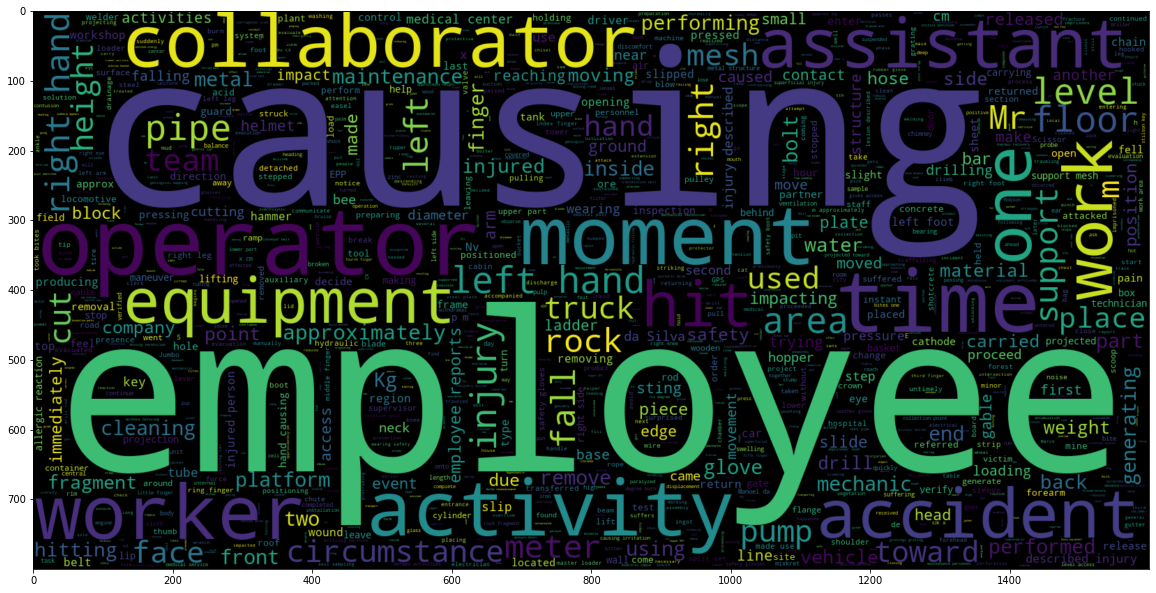

In [40]:
#plotting the most frequent words with wordcloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df['Description'].values))
plt.imshow(wc , interpolation = 'bilinear')

In [41]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(df['Description']))
len(tokenizer.word_counts)

3453

only 3453 words . including stop words


In [42]:
#Analysing the frequent words
word_count_array = tokenizer.word_counts
word=[]
counts=[]
for key,val in word_count_array.items():
  word.append(key)
  counts.append(val)
df_cnt=pd.DataFrame(list(zip(word,counts)),columns=['word','count'])
df_cnt.nlargest(40,['count'])

,word,count
2,the,4355
5,of,1517
12,to,672
32,and,612
57,in,556
47,a,532
52,was,439
35,at,350
25,on,307
132,that,294


In [43]:
#Preprocessing with NLP
def remove_punctuation(text):
    return re.sub('[^a-zA-Z]', ' ', str(text))

def lower_case(text):
    return text.lower()    

def remove_tags(text):    
    return re.sub("</?.*?>"," <> ", text)

def remove_special_chars_and_digits(text):
    return re.sub("(\\d|\\W)+"," ", text)

def stopword_lemma(text):
    token = nltk.word_tokenize(text)
    text_stop = [x for x in token if x not in set(stopwords.words('english'))]
    lemmatizer = WordNetLemmatizer()
    text_lemma = [lemmatizer.lemmatize(word) for word in text_stop]
    text_lemma = ' '.join(text_lemma)
    return text_lemma


def normalize_text(text: str) -> str:
    text = remove_punctuation(text)
    text = lower_case(text)
    text = remove_tags(text)
    text = remove_special_chars_and_digits(text)
    text = stopword_lemma(text)
    
    return text

In [44]:
df['normalized_Description'] = df['Description'].apply(normalize_text)

In [45]:
#Encoding other categorical variables
df['Employee or Third Party']=le.fit_transform(df['Employee or Third Party'])
df['Critical Risk']=le.fit_transform(df['Critical Risk'])
df['Genre']=le.fit_transform(df['Genre'])
df['Industry Sector']=le.fit_transform(df['Industry Sector'])

In [46]:
#Creating glove embeddings
embeddings_index = {}
EMBEDDING_FILE = '/content/drive/My Drive/AIML/glove.6B.300d.txt'
f = open(EMBEDDING_FILE)
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

400000it [00:26, 15009.81it/s]

Found 400000 word vectors.


In [47]:
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [48]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
ind_glove_df=pd.DataFrame()
ind_glove_df = [sent2vec(x) for x in tqdm(df['normalized_Description'])]

100%|██████████| 425/425 [00:00<00:00, 2293.23it/s]


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True)
    vec_tfidf.fit(df['normalized_Description'])
    X = vec_tfidf.transform(df['normalized_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

ind_tfidf_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TFIDF_activity,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_moment,TFIDF_operator,TFIDF_right,TFIDF_time,...,TFIDF_activity,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_moment,TFIDF_operator,TFIDF_right,TFIDF_time
0,0.0,0.000000,0.0,0.645352,0.000000,0.000000,0.763885,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.645352,0.000000,0.000000,0.763885,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.469521,0.0,0.488204,0.548883,0.489831,0.000000,0.0,0.000000,0.0,...,0.0,0.469521,0.0,0.488204,0.548883,0.489831,0.000000,0.0,0.000000,0.0
3,0.0,0.328010,0.0,0.682125,0.383453,0.342199,0.403706,0.0,0.000000,0.0,...,0.0,0.328010,0.0,0.682125,0.383453,0.342199,0.403706,0.0,0.000000,0.0
4,0.0,0.536280,0.0,0.000000,0.626925,0.000000,0.000000,0.0,0.565127,0.0,...,0.0,0.536280,0.0,0.000000,0.626925,0.000000,0.000000,0.0,0.565127,0.0


In [50]:
df = df.join(pd.DataFrame(ind_tfidf_df).iloc[:,0:30].reset_index(drop=True))

In [51]:
df.columns

Index(['Date & Timestamp', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description', 'Date',
       'Year', 'Month', 'Day', 'Weekday', 'WeekofYear', 'Season',
       'Description_Length', 'normalized_Description', 'TFIDF_activity',
       'TFIDF_causing', 'TFIDF_employee', 'TFIDF_hand', 'TFIDF_injury',
       'TFIDF_left', 'TFIDF_moment', 'TFIDF_operator', 'TFIDF_right',
       'TFIDF_time', 'TFIDF_activity', 'TFIDF_causing', 'TFIDF_employee',
       'TFIDF_hand', 'TFIDF_injury', 'TFIDF_left', 'TFIDF_moment',
       'TFIDF_operator', 'TFIDF_right', 'TFIDF_time', 'TFIDF_activity',
       'TFIDF_causing', 'TFIDF_employee', 'TFIDF_hand', 'TFIDF_injury',
       'TFIDF_left', 'TFIDF_moment', 'TFIDF_operator', 'TFIDF_right',
       'TFIDF_time'],
      dtype='object')

In [52]:
X=df.drop(['Date & Timestamp','Accident Level','Potential Accident Level','Description','normalized_Description','Date','Year','Month','Day','WeekofYear','Weekday','Description_Length'],axis=1)
Y=np.array(df['Accident Level'])
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)
print('Training utterances: {}'.format(X_train.shape[0]))
print('Validation utterances: {}'.format(X_test.shape[0]))

Training utterances: 340
Validation utterances: 85


In [53]:
X.head(3)

,Countries,Local,Industry Sector,Genre,Employee or Third Party,Critical Risk,Season,TFIDF_activity,TFIDF_causing,TFIDF_employee,...,TFIDF_activity,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_moment,TFIDF_operator,TFIDF_right,TFIDF_time
0,1,1,1,1,1,20,2,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.645352,0.000000,0.000000,0.763885,0.0,0.0,0.0
1,2,2,1,1,0,21,2,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,1,3,1,1,2,15,2,0.0,0.469521,0.0,...,0.0,0.469521,0.0,0.488204,0.548883,0.489831,0.000000,0.0,0.0,0.0


In [54]:
scores=pd.DataFrame(columns={'Model','Accuracy','Recall','Precision','F1-score'})
def display_score(y_test,y_pred,modelname):
  acc=accuracy_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred,average='weighted')
  precision=precision_score(y_test,y_pred,average='weighted')
  f1=f1_score(y_test, y_pred, average='weighted')
  print('Model : ',modelname)
  print('F1 score: Macro', f1)
  print('Accuracy score on test data : ' ,acc)
  print('Recall score on test data : ', recall)
  print('Precision score on test data : ', precision)
  dict1={'Model':modelname,'Accuracy':acc,'Recall':recall,'Precision':precision,'F1-score':f1}
  return dict1

In [55]:
#Building basic models
model_rf=RandomForestClassifier()
model_rf.fit(X_train, y_train)
predrf = model_rf.predict(X_test)
scores=scores.append(display_score(y_test,predrf,'Random Forest'),ignore_index=True)

Model :  Random Forest
F1 score: Macro 0.7332046332046331
Accuracy score on test data :  0.7764705882352941
Recall score on test data :  0.7764705882352941
Precision score on test data :  0.7384959046909904


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
preddt = model_dt.predict(X_test)
scores=scores.append(display_score(y_test,preddt,'Decision Tree'),ignore_index=True)

Model :  Decision Tree
F1 score: Macro 0.6978944847952749
Accuracy score on test data :  0.6705882352941176
Recall score on test data :  0.6705882352941176
Precision score on test data :  0.7449773755656108


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
predknn=knn_clf.predict(X_test)
scores=scores.append(display_score(y_test,predknn,'KNN model'),ignore_index=True)

Model :  KNN model
F1 score: Macro 0.7321799307958478
Accuracy score on test data :  0.8117647058823529
Recall score on test data :  0.8117647058823529
Precision score on test data :  0.6668067226890756


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,Y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Best leaf_size: 1
Best p: 2
Best n_neighbors: 8


In [59]:
knn_3 = KNeighborsClassifier(leaf_size=best_model.best_estimator_.get_params()['leaf_size'],n_neighbors=best_model.best_estimator_.get_params()['n_neighbors'],p=best_model.best_estimator_.get_params()['p'])
knn_3.fit(X_train,y_train)
knn3pred=knn_3.predict(X_test)
scores=scores.append(display_score(y_test,knn3pred,'KNN Gridsearch'),ignore_index=True)

Model :  KNN Gridsearch
F1 score: Macro 0.7263157894736842
Accuracy score on test data :  0.8
Recall score on test data :  0.8
Precision score on test data :  0.6650602409638554


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [61]:
# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
 
# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
 
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
 
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
tree_cv.fit(X, Y)
 
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 4}
Best score is 0.7435294117647059


In [62]:
tree_2 = DecisionTreeClassifier(criterion=tree_cv.best_estimator_.get_params()['criterion'],max_depth=tree_cv.best_estimator_.get_params()['max_depth'],max_features=tree_cv.best_estimator_.get_params()['max_features'],min_samples_leaf=tree_cv.best_estimator_.get_params()['min_samples_leaf'])
tree_2.fit(X_train,y_train)
tree2pred=tree_2.predict(X_test)
scores=scores.append(display_score(y_test,tree2pred,'DT Gridsearch'),ignore_index=True)

Model :  DT Gridsearch
F1 score: Macro 0.7263157894736842
Accuracy score on test data :  0.8
Recall score on test data :  0.8
Precision score on test data :  0.6650602409638554


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
 
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression(max_iter=10000)
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
logreg_cv.fit(X, Y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.7435294117647059


In [64]:
logreg = LogisticRegression(max_iter=10000,C=logreg_cv.best_estimator_.get_params()['C'])
logreg.fit(X_train,y_train)
logregpred=logreg.predict(X_test)
scores=scores.append(display_score(y_test,logregpred,'LR Gridsearch'),ignore_index=True)

Model :  LR Gridsearch
F1 score: Macro 0.7274255156608098
Accuracy score on test data :  0.8117647058823529
Recall score on test data :  0.8117647058823529
Precision score on test data :  0.658961937716263


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [66]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
print("Best score is {}".format(grid_search.best_score_))

RandomForestClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=3,
                       n_estimators=25)
Best score is 0.7264705882352942


In [67]:
rf1=RandomForestClassifier(max_depth=grid_search.best_estimator_.get_params()['max_depth'], max_features=grid_search.best_estimator_.get_params()['max_features'], max_leaf_nodes=grid_search.best_estimator_.get_params()['max_leaf_nodes'],
                       n_estimators=grid_search.best_estimator_.get_params()['n_estimators'])
rf1.fit(X_train,y_train)
rfgrid=rf1.predict(X_test)
scores=scores.append(display_score(y_test,rfgrid,'RF Gridsearch'),ignore_index=True)

Model :  RF Gridsearch
F1 score: Macro 0.7274255156608098
Accuracy score on test data :  0.8117647058823529
Recall score on test data :  0.8117647058823529
Precision score on test data :  0.658961937716263


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocabSize = 2000
tokenizer = Tokenizer(num_words=vocabSize, split=' ')
tokenizer.fit_on_texts(df['normalized_Description'].values)
X = tokenizer.texts_to_sequences(df['normalized_Description'].values)
X = pad_sequences(X)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional

embed_dim = 128
lstm_out = 196

model_lstm = Sequential()
model_lstm.add(Embedding(vocabSize, embed_dim,input_length = X.shape[1]))
model_lstm.add(SpatialDropout1D(0.4))
model_lstm.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
model_lstm.add(Dense(5,activation='softmax'))
model_lstm.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 95, 128)           256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 95, 128)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 392)              509600    
 l)                                                              
                                                                 
 dense (Dense)               (None, 5)                 1965      
                                                                 
Total params: 767,565
Trainable params: 767,565
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(df['Accident Level']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(340, 95) (340, 5)
(85, 95) (85, 5)


In [71]:
batch_size = 128
model_lstm.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10
3/3 - 13s - loss: 1.5668 - accuracy: 0.4824 - 13s/epoch - 4s/step
Epoch 2/10
3/3 - 7s - loss: 1.2822 - accuracy: 0.7294 - 7s/epoch - 2s/step
Epoch 3/10
3/3 - 7s - loss: 0.9714 - accuracy: 0.7294 - 7s/epoch - 2s/step
Epoch 4/10
3/3 - 6s - loss: 0.9334 - accuracy: 0.7294 - 6s/epoch - 2s/step
Epoch 5/10
3/3 - 7s - loss: 0.9253 - accuracy: 0.7294 - 7s/epoch - 2s/step
Epoch 6/10
3/3 - 7s - loss: 0.9110 - accuracy: 0.7294 - 7s/epoch - 2s/step
Epoch 7/10
3/3 - 8s - loss: 0.8999 - accuracy: 0.7294 - 8s/epoch - 3s/step
Epoch 8/10
3/3 - 10s - loss: 0.8803 - accuracy: 0.7294 - 10s/epoch - 3s/step
Epoch 9/10
3/3 - 7s - loss: 0.8581 - accuracy: 0.7294 - 7s/epoch - 2s/step
Epoch 10/10
3/3 - 7s - loss: 0.8095 - accuracy: 0.7294 - 7s/epoch - 2s/step


In [72]:
Ypred=model_lstm.predict(X_test)
Ypred=Ypred.round(decimals=0)
scores=scores.append(display_score(Y_test,Ypred,'LSTM'),ignore_index=True)

3/3 [==============================] - 1s 147ms/step
Model :  LSTM
F1 score: Macro 0.7027027027027027
Accuracy score on test data :  0.7647058823529411
Recall score on test data :  0.7647058823529411
Precision score on test data :  0.65


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
scores=scores[['Model','Accuracy','Recall','Precision','F1-score']]
print(scores)

            Model  Accuracy    Recall  Precision  F1-score
0   Random Forest  0.776471  0.776471   0.738496  0.733205
1   Decision Tree  0.670588  0.670588   0.744977  0.697894
2       KNN model  0.811765  0.811765   0.666807  0.732180
3  KNN Gridsearch  0.800000  0.800000   0.665060  0.726316
4   DT Gridsearch  0.800000  0.800000   0.665060  0.726316
5   LR Gridsearch  0.811765  0.811765   0.658962  0.727426
6   RF Gridsearch  0.811765  0.811765   0.658962  0.727426
7            LSTM  0.764706  0.764706   0.650000  0.702703
